# Homework 4 Step 2
## K-Means Clustering

Here, we will explore the k-means clustering algorithm discussed in class, once again using the Iris dataset.

## Step 2.1

Download the Iris flower data set and run the `sklearn` version of k means on it.
Then, we'll compute the error of the model on the training data.

In [1]:
import pandas as pd
import sklearn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', \
                     header=None,\
                     names=['sepal_length','sepal_width','petal_length','petal_width','class'])

In [2]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,
           init='random',
           n_init=30,
           max_iter=300,
           tol=1e-04,
           random_state=0)
iris_model = km.fit(iris_df.drop(['class'], axis=1).as_matrix())

In [3]:
iris_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [4]:
predicted_df = pd.DataFrame(iris_model.labels_).rename(columns={0:'predicted'}).astype(int)

In [5]:
iris_df_km = iris_df.join(predicted_df)

In [6]:
iris_df_km['class'] = iris_df_km['class'].apply(lambda c : 0 if c == 'Iris-setosa' else 1 if c == 'Iris-versicolor' else 2)

In [7]:
iris_df_km

,sepal_length,sepal_width,petal_length,petal_width,class,predicted
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,1.5,0.2,0,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


### Step 2.1 Results

In [8]:
misclassified = iris_df_km[iris_df_km['class'] != iris_df_km['predicted']]
misclassified

,sepal_length,sepal_width,petal_length,petal_width,class,predicted
52,6.9,3.1,4.9,1.5,1,2
77,6.7,3.0,5.0,1.7,1,2
101,5.8,2.7,5.1,1.9,2,1
106,4.9,2.5,4.5,1.7,2,1
113,5.7,2.5,5.0,2.0,2,1
114,5.8,2.8,5.1,2.4,2,1
119,6.0,2.2,5.0,1.5,2,1
121,5.6,2.8,4.9,2.0,2,1
123,6.3,2.7,4.9,1.8,2,1
126,6.2,2.8,4.8,1.8,2,1


In [9]:
len(misclassified)

16

## Step 2.2

Plot the sample data with respect to the sepal lengths and widths, and then with respect to the petal lengths and widths. If you had to pick, which pair of features should you use in your clustering?

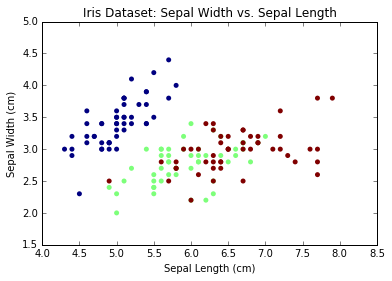

In [10]:
plt.figure(1)
plt.clf()
plt.scatter(iris_df_km.sepal_length, iris_df_km.sepal_width, c=iris_df_km['class'], marker='.', s=100, edgecolor='None')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Sepal Width vs. Sepal Length')
plt.show()

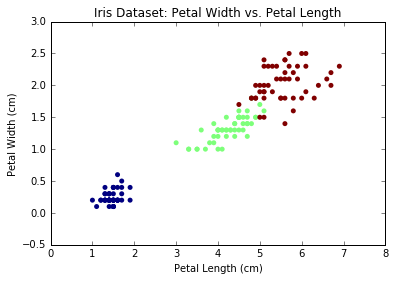

In [11]:
plt.figure(2)
plt.clf()
plt.scatter(iris_df_km.petal_length, iris_df_km.petal_width, c=iris_df_km['class'], marker='.', s=100, edgecolor='None')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset: Petal Width vs. Petal Length')
plt.show()

## Step 2.3

Now that you've figured out which subset of features you want to use, try using `sklearn`'s built-in KMeans to model the data.

In [12]:
km = KMeans(n_clusters=3,
           init='random',
           n_init=30,
           max_iter=300,
           tol=1e-04,
           random_state=0)
iris_model = km.fit(iris_df.drop(['sepal_length','sepal_width','class'], axis=1).as_matrix())

In [13]:
iris_model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's see how well the classifier works on the training data. Determine which data points are incorrectly labeled by the classifier.

In [14]:
predicted_df = pd.DataFrame(iris_model.labels_).rename(columns={0:'predicted'}).astype(int)

In [15]:
iris_df_km = iris_df.join(predicted_df)

In [16]:
iris_df_km['class'] = iris_df_km['class'].apply(lambda c : 2 if c == 'Iris-setosa' else 1 if c == 'Iris-versicolor' else 0)

### Step 2.3 Results

In [17]:
misclassified = iris_df_km[iris_df_km['class'] != iris_df_km['predicted']]
misclassified

,sepal_length,sepal_width,petal_length,petal_width,class,predicted
77,6.7,3.0,5.0,1.7,1,0
83,6.0,2.7,5.1,1.6,1,0
106,4.9,2.5,4.5,1.7,0,1
119,6.0,2.2,5.0,1.5,0,1
126,6.2,2.8,4.8,1.8,0,1
138,6.0,3.0,4.8,1.8,0,1


In [18]:
len(misclassified)

6

## Step 2.4

In the below code, follow the comments to replace the necessary sections and then evaluate the cell.

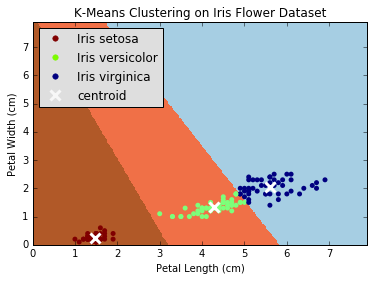

In [19]:
# Mesh step size.
h = 0.02
# Plot decision boundary.

# TODO: Replace iris_df_res with your combined iris dataframe & predicted labels.
px_min, px_max = iris_df_km.petal_length.min() - 1, iris_df_km.petal_length.max() + 1
py_min, py_max = iris_df_km.petal_length.min() - 1, iris_df_km.petal_length.max() + 1
pxx, pyy = np.meshgrid(np.arange(px_min, px_max, h), np.arange(py_min, py_max, h))
# Label each point in the mesh for a color grid.
Z = iris_model.predict(np.c_[pxx.ravel(),pyy.ravel()])
Z = Z.reshape(pxx.shape)

# TODO: Replace y_km with your trained K-Means model.
centroids = iris_model.cluster_centers_
plt.figure(3)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(pxx.min(), pxx.max(), pyy.min(), pyy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
# Draw sample data points. 

# TODO: Replace iris_df_res with your combined iris dataframe & predicted labels.
plt.scatter(iris_df_km.petal_length, iris_df_km.petal_width, c=iris_df_km['predicted'], marker='.', s=100, edgecolor='None')
# Draw centroids
plt.plot(centroids[:, 0], centroids[:, 1], 'wx', markersize=10, zorder=1, mew=3)

plt.title('K-Means Clustering on Iris Flower Dataset')
plt.xlim(px_min, px_max)
plt.ylim(py_min, py_max)
# plt.xticks(())
# plt.yticks(())
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

setosa_point = mlines.Line2D([], [], color='maroon', marker='.', markersize=11, label='Iris setosa', linestyle='')
versicolor_point = mlines.Line2D([], [], color='lawngreen', marker='.', markersize=11, label='Iris versicolor', linestyle='')
virginica_point = mlines.Line2D([], [], color='navy', marker='.', markersize=11, label='Iris virginica', linestyle='')
centroid_point = mlines.Line2D([], [], color='0.97', marker='x', markersize=10, mew=3, label='centroid', linestyle='')
legend = plt.legend(handles=[setosa_point, versicolor_point, virginica_point, centroid_point], numpoints=1, loc=2)
legend_frame = legend.get_frame()
legend_frame.set_facecolor('0.87')

plt.show()